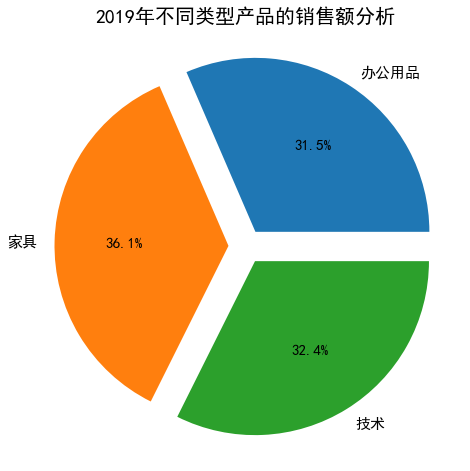

In [3]:
# -*- coding: utf-8 -*-

#声明Notebook类型，必须在引入pyecharts.charts等模块前声明
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_NOTEBOOK

import matplotlib.pyplot as plt
import pymysql
plt.rcParams['font.sans-serif'] = ['SimHei']

#连接Hadoop数据库
v1 = []
v2 = []
conn = pymysql.connect(host='lylg102',port=3306,user='root',password='000000',db='test',charset='utf8')
cursor = conn.cursor()

#读取Hadoop订单表数据
sql_num = "SELECT category,ROUND(SUM(sales),2)FROM orders WHERE dt=2019 GROUP BY category"
cursor.execute(sql_num)
sh = cursor.fetchall()
for s in sh:
    v1.append(s[0]) 
    v2.append(s[1])

plt.figure(figsize=(15,8))      #设置饼图大小
labels = v1
explode =[0.1, 0.1, 0.1]        #每一块离开中心距离
plt.pie(v2, explode=explode, labels=labels,autopct='%1.1f%%',textprops={'fontsize':15,'color':'black'})
plt.title('2019年不同类型产品的销售额分析',fontsize = 20)
plt.show()